In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score

In [2]:
cd "/content/drive/My Drive/Colab Notebooks/dw_matrix"

/content/drive/My Drive/Colab Notebooks/dw_matrix


In [3]:
pwd

'/content/drive/My Drive/Colab Notebooks/dw_matrix'

In [4]:
cd matrix_shoes/

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_shoes


In [5]:
df = pd.read_csv('data/shoes_prices.csv', low_memory=False)
df.shape

(18280, 48)

In [6]:
 # Listing all comuns in dataset.
 df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [7]:
# We want to predict prices_amountmin.
# We will run Baseline Model - simple model.

mean_price = np.mean(df.prices_amountmin)
mean_price

93.53952188183217

In [0]:
# So our mean predicted value for every shoe id 93.5.

In [9]:
# Generate result column

y_true = df.prices_amountmin
y_true.shape[0]

18280

In [10]:
# We need our predictions(mean price) this many times how real prices were (true answers) to compare them.
# this is like [2] * 4 = [2,2,2,2]

y_pred = [mean_price] * y_true.shape[0]
y_pred[:10]

[93.53952188183217,
 93.53952188183217,
 93.53952188183217,
 93.53952188183217,
 93.53952188183217,
 93.53952188183217,
 93.53952188183217,
 93.53952188183217,
 93.53952188183217,
 93.53952188183217]

In [11]:
# Now checking mean_absolute_error, how our baseline model is +/- 63$ on average wrong.

mean_absolute_error(y_true,y_pred)

63.968341227870624

---
#**Normalizing data**
Normalizing the "long tails" wit log function

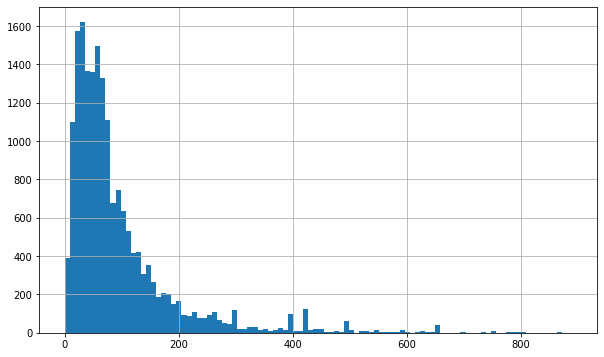

In [12]:
# Raw data histogram.

df.prices_amountmin.hist(bins=100,figsize=(10,6))

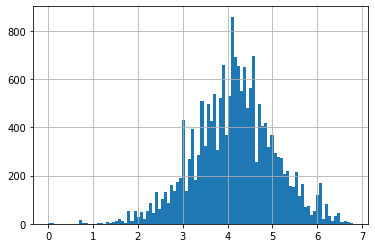

In [13]:
# Normalized with '' data hist.

np.log(df.prices_amountmin+1).hist(bins=100) # we must add +1 becasue log(0) = -inf / will crash

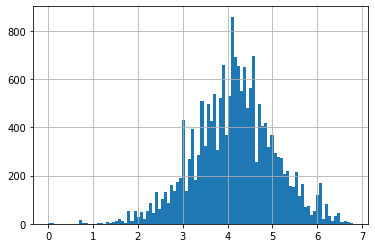

In [14]:
# Or use log1p.

np.log1p(df.prices_amountmin).hist(bins=100)

---

In [15]:
# Try median instad of mean.

np.median(df.prices_amountmin)

64.95

In [0]:
# Median 64 mean that 50% of data is 64$ or less.
# It is very unsymmetric, there are way more shoes less than 64$ than 64$+ shoes.

![](https://drive.google.com/uc?id=1SqRFA4aQFPwnjsnQ_1YQ8uaaBFahrTsy)

In [17]:
y_true = df.prices_amountmin
y_pred = [np.median(df.prices_amountmin)] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.01120240700219

---
#**Logarythmic transformation**

In [18]:
# Mean of log1p.
np.mean(np.log1p(df.prices_amountmin))

4.157759197235119

In [19]:
# We are reversing the log function with exp function.

np.exp(np.mean(np.log1p(df.prices_amountmin))) -1 # -1 because log1p is adding 1.

# Use np.expm1 - substracting 1.

np.expm1(np.mean(np.log1p(df.prices_amountmin))) 

62.92811169273113

In [20]:
y_true = df.prices_amountmin
price_log_mean = np.exp(np.mean(np.log1p(df.prices_amountmin))) -1

y_pred = [price_log_mean] * y_true.shape[0]

mean_absolute_error(y_true,y_pred)

58.03539547661041

---
#**Advanced model**

In [21]:
df.brand.value_counts()

Nike            1709
PUMA             574
Ralph Lauren     524
New Balance      361
VANS             356
                ... 
Bico               1
Foundry            1
1031               1
Odor-Eaters        1
Tallia             1
Name: brand, Length: 1856, dtype: int64

In [22]:
# Transforming data from categorical to numbers.

df.brand.factorize() # 2 lists one with numerical values, second with label index.

(array([  0,   0,   1, ..., 411, 411, 411]),
 Index(['Josmo', 'SERVUS BY HONEYWELL', 'NATIVE', 'MAUI AND SONS', 'Twisted X',
        'Lacoste', 'Rubies', 'unbranded', 'PUMA', 'Filament',
        ...
        'Bindi', 'Holloway Sportswear', 'River City', 'AH by Android Homme',
        'SEG', 'American Rag', 'BININBOX', 'HEAD', 'Swix', 'Xray, XRay'],
       dtype='object', length=1856))

In [0]:
# Create new column.

df['brand_cat'] = df.brand.factorize()[0]

In [0]:
# This matrix consists of columns (features) and rows (observations).
# Feature here is brand_cat - it is X / feature list (here only one feature).

feats = ['brand_cat']
X = df[ feats ].values
y = df[ 'prices_amountmin'].values

In [25]:
# Why we pass .values

print('Without .values:',type(df[ 'prices_amountmin']),'\n\n',df[ 'prices_amountmin'][:4], "\n")
print('-------------------------------------------------------\n')
print('With .values:',type(df[ 'prices_amountmin'].values), '\n\n', df[ 'prices_amountmin'].values)

Without .values: <class 'pandas.core.series.Series'> 

 0    39.89
1    51.99
2    40.02
3    50.31
Name: prices_amountmin, dtype: float64 

-------------------------------------------------------

With .values: <class 'numpy.ndarray'> 

 [39.89 51.99 40.02 ... 32.48 31.48 72.  ]


In [26]:
# Defining model we will use.

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model,X, y, scoring='neg_mean_absolute_error')

# Take mean value from scores and standard deviation.

print('Mean: ', np.mean(scores),'    Standard deviation: ', np.std(scores))

Mean:  -58.38655694633361     Standard deviation:  4.223555478221712


# Experimenting with features

In [98]:
# Create function
feats = ['brand_cat']

def run_model(feats):
  
  X = df[ feats ].values
  y = df[ 'prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=22)

  scores = cross_val_score(model,X, y, scoring='neg_mean_absolute_error')

  return np.mean(scores), np.std(scores)

run_model(feats)

(-46.11488284360676, 3.2435097548209986)

In [0]:
df['prices_issale_cat'] = df.prices_issale.factorize()[0]

In [0]:
df['manufacturer_cat'] = df.manufacturer.factorize()[0]

In [0]:
df['prices_condition_cat'] = df.prices_condition.factorize()[0]

In [0]:
df['prices_merchant_cat'] = df.prices_merchant.factorize()[0]

In [0]:
custom_feats =['manufacturer_cat','brand_cat','prices_condition_cat','prices_merchant_cat','prices_issale_cat']

In [99]:
run_model(custom_feats)

(-47.091876888915706, 3.966819949771453)

In [0]:
# !git config --global user.email "e-mail"
# !git config --global user.name "name"

In [0]:
!git add matrix_shoes/matrix_04.ipynb

In [0]:
!git commit -m "Simple ML model for shoe prices"

In [0]:
! git push -u origin master